### EA614 2020.1
## EFC5
____
##### Aluno: Marcos Diaz 
##### RA: 221525

### Atividades
##### 2 (a) Sequência x[n]

Preparação:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn

Domínio

In [34]:
f0 = 3
fs = 64
N = 64
n = np.linspace(0, N-1, N) 

x[n]:

In [35]:
x = [np.sin(2*np.pi*f0*n/fs) for n in n]

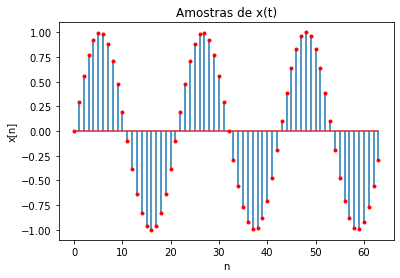

In [36]:
plt.title("Amostras de x(t)")
plt.xlabel("n")
plt.ylabel("x[n]")
g = plt.stem(n, x, markerfmt='r.', linefmt=None, use_line_collection=True)

##### 2 (b) Transformada de x[n]

![(a)](transf.jpeg)

##### 2 (c) DFT 

É esperado um espectro imaginário e par, pois x(t) é real e ímpar.

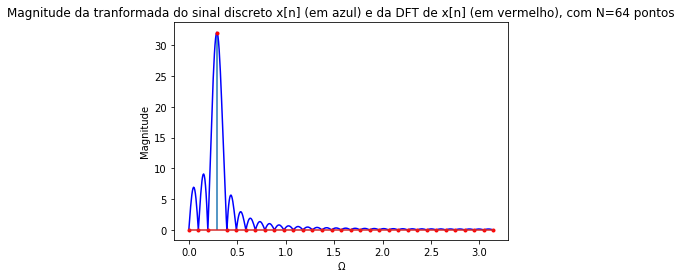

In [37]:
N=64
# X(K)
k = np.linspace(0, N-1, N)
dft_x = np.fft.fft(x, n=N)
omega = 2*np.pi/N*k

# X(e^(j*omega))
w, h = sgn.freqz(x)

plt.title("Magnitude da tranformada do sinal discreto x[n] (em azul) e da DFT de x[n] (em vermelho), com N=64 pontos")
plt.xlabel("Ω")
plt.ylabel("Magnitude")

g2 = plt.plot(w, np.abs(h), 'b')
g = plt.stem(omega[:int(N/2)+1], np.abs(dft_x)[:int(N/2)+1], markerfmt='r.', linefmt=None, use_line_collection=True)

(Utilizei a função plot() para o gráfico da transformada de sinal discreto (em azul) para aproximar seu caráter contínuo, ainda que, por ser uma transformada digital, ela também seja contínua)

Vemos que a DFT apresenta uma única frequência dominante (em $2\pi \frac{fo}{fs}$, aproximadamente 0,3), apresentando uma forma igual à da resposta em frequência da senoide analógica (|H(jw)|). Isso ocorreu pois o número de pontos da DFT é igual ao tamanho do sinal discreto, ou seja, para a transformada o sinal discreto limitado é uma janela de um sinal discreto ilimitado no tempo.

Já a forma da transformada contínua do sinal discreto apresenta uma forma próxima da função sinc em torno da frequência fundamental da senoide. Isso é explicado pois a trasnformada considera que o sinal é uma multiplicação da senoide por uma janela retangular, cuja trasnformada é a função sinc.

Nota-se aqui uma diferença importante entre a trasnformada de tempo dicreto e a DFT: a primeira admite que o sinal discreto representa o único intervalo não nulo do sinal; a segunda considera que esse sinal discreto é uma janela de um sinal que se estende periodicamente até o infinito.

##### 2 (d) DFT com 2N pontos

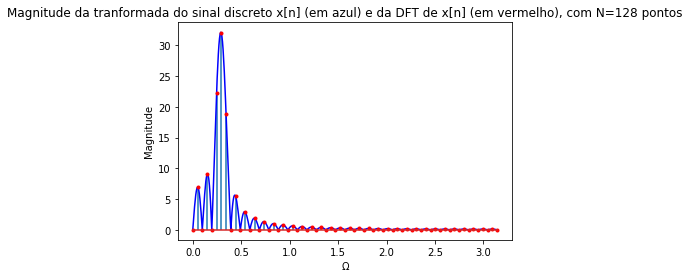

In [38]:
N=128
# X(K)
k = np.linspace(0, N-1, N)
dft_x = np.fft.fft(x, n=N)
omega = 2*np.pi/N*k

# X(e^(j*omega))
w, h = sgn.freqz(x)

plt.title("Magnitude da tranformada do sinal discreto x[n] (em azul) e da DFT de x[n] (em vermelho), com N=128 pontos")
plt.xlabel("Ω")
plt.ylabel("Magnitude")

g2 = plt.plot(w, np.abs(h), 'b')
g = plt.stem(omega[:int(N/2)+1], np.abs(dft_x)[:int(N/2)+1], markerfmt='r.', linefmt=None, use_line_collection=True)

É visível que a DFT representa amostras da transformada para tempo discreto e o espectro obtido não é mais representativo da resposta em frequência da senoide analógica. 

Isso ocorre pois agora, com N>M, o sinal de entrada tem "zero padding", ou seja, é uma janela de uma função descontínua com valores nulos nos instantes pós n=64. Ou seja, a DFT não mais aproxima o espectro da senoide analógica pura, mas sim o espectro de uma senóide com anulamentos periódicos. Assim, torna-se somente uma amostragem da trasnformada de tempo contínuo.

A transformada de tempo discreto não muda, pois ela smepre considerou o sinal discreto como único intervalo de tempo com magnitude não nula, diferente da DFT que considera janelas.

##### 2 (e) Nova frequência fundamental

In [39]:
f0 = 3.4
x2 = [np.sin(2*np.pi*f0*n/fs) for n in n]

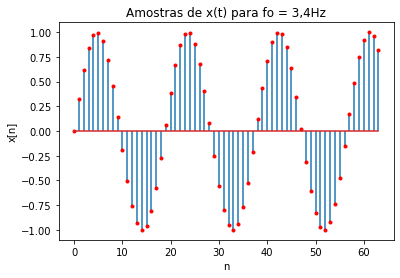

In [40]:
plt.title("Amostras de x(t) para fo = 3,4Hz")
plt.xlabel("n")
plt.ylabel("x[n]")
g = plt.stem(n, x2, markerfmt='r.', linefmt=None, use_line_collection=True)

Percebe-se que a janela escolhida não respeita o novo período da senoide. Observa-se também períodos incompletos na amostra.

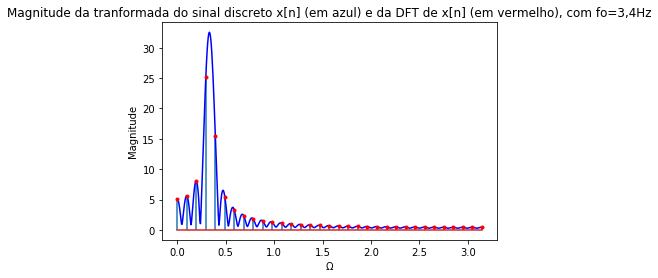

In [41]:
N=64
# X(K)
k = np.linspace(0, N-1, N)
dft_x = np.fft.fft(x2, n=N)
omega = 2*np.pi/N*k

# X(e^(j*omega))
w, h = sgn.freqz(x2)

plt.title("Magnitude da tranformada do sinal discreto x[n] (em azul) e da DFT de x[n] (em vermelho), com fo=3,4Hz")
plt.xlabel("Ω")
plt.ylabel("Magnitude")

g2 = plt.plot(w, np.abs(h), 'b')
g = plt.stem(omega[:int(N/2)+1], np.abs(dft_x)[:int(N/2)+1], markerfmt='r.', linefmt=None, use_line_collection=True)

Observamos que a DFT não aproxima mais a transformada de tempo discreto, já que seu valor máximo não mais se encontra na frequência fundamental de 3,4Hz. Isso ocorre pois a janela contém períodos não interos nas extremidades, de modo que o sinal que a DFT tenta transformar não é uma amostragem da senóide pura, mas um sinal deformado.

(A deformação fica clara se imaginarmos que uma réplica do sinal x[n] está adjacente ao ponto n=63, de modo que coexistem dois arcos positivos da senoide adjacentes)